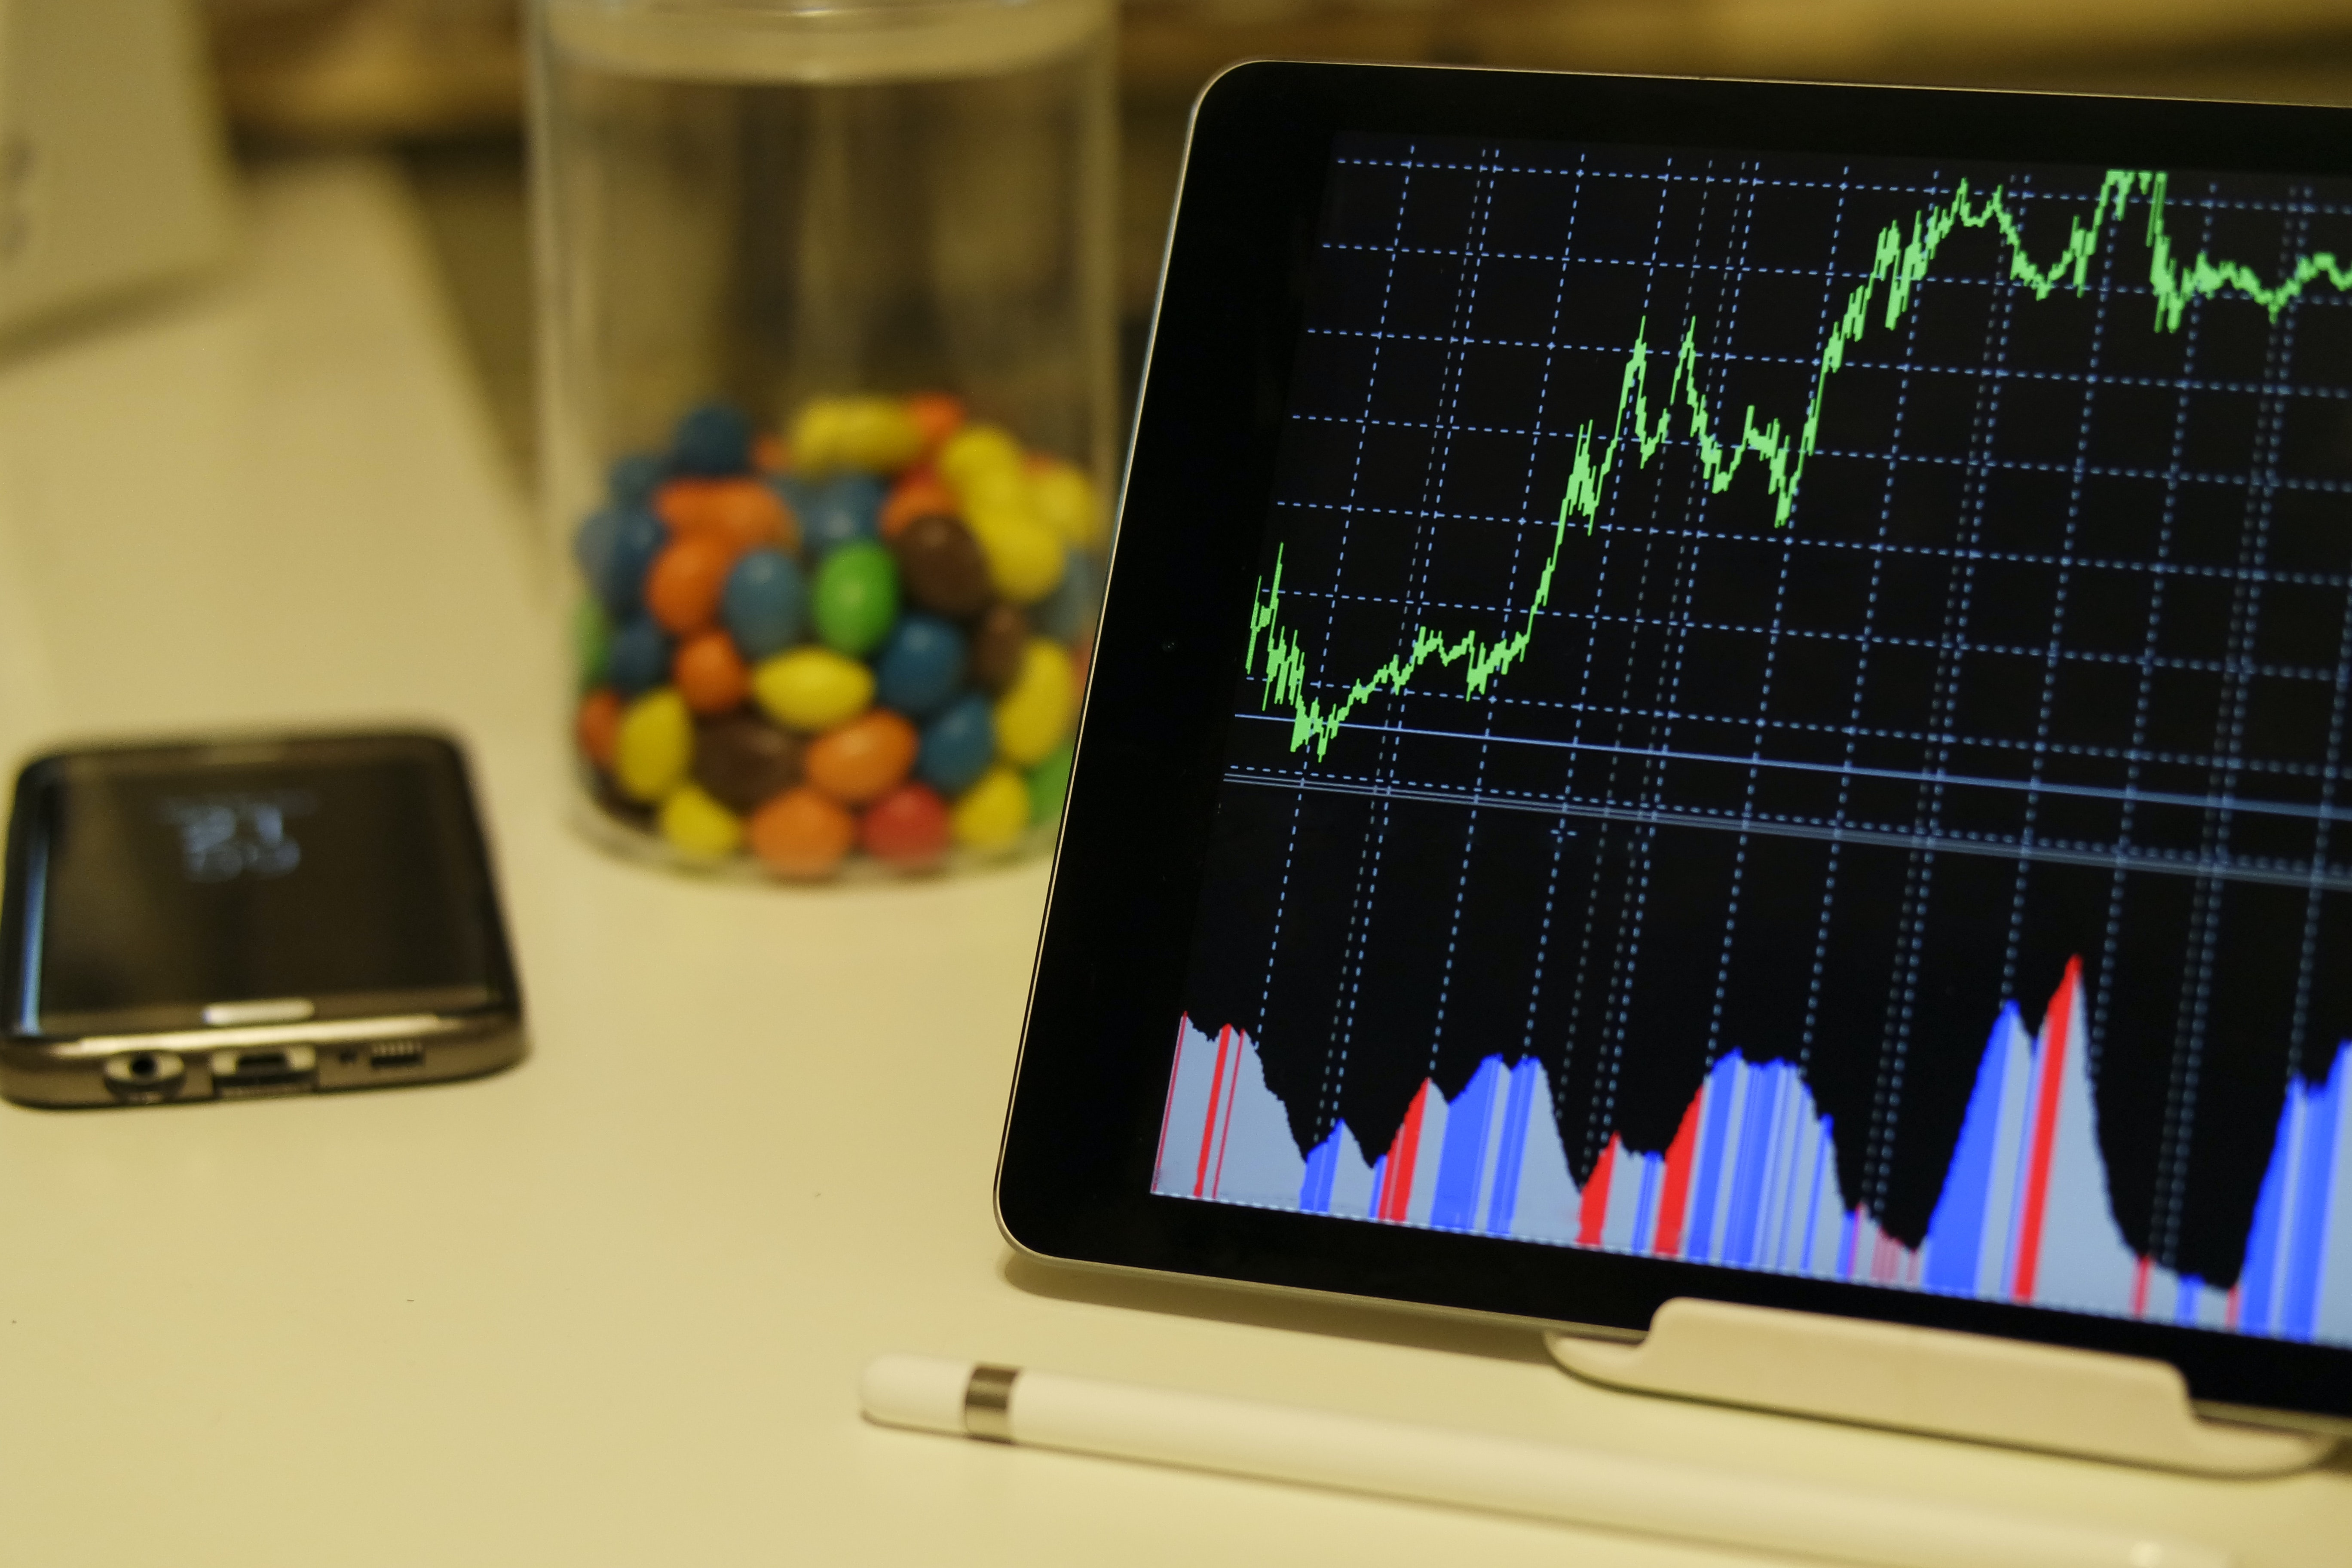

## What is time series data?
Time series data, also referred to as time-stamped data, is a sequence of data points indexed in time order.

These data points typically consist of successive measurements made from the same source over a fixed time interval and are used to track change over time.

* In this notebook, I've discovered and explored data from stock market, particularly some tech stocks like Apple, Amazon, Microsoft and Google.

* I've used yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib.

* I've tried to analyze risk of stocks, based on its previous performance history.

* Long Short Term Memory(LSTM) method is what I've used to predict future stock prices!

In [ ]:
#basic libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#to read stock data from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

#for time stamps
from datetime import datetime


## CHANGE IN PRICE OF THE STOCK OVERTIME

In [ ]:
tech_stocks = ['AAPL','GOOG','MSFT','AMZN']
tech_stocks = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [ ]:
for stock in tech_stocks:
  globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
tech_companies = [AAPL,GOOG,MSFT,AMZN]
Names = ['APPLE','GOOGLE','MICROSOFT','AMAZON']

for company, name in zip(tech_companies, Names):
  company["Names"] = name

df = pd.concat(tech_companies, axis=0)
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-28  133.779999  133.949997  131.850006  133.139999  133.139999   
2023-08-29  133.380005  135.139999  133.250000  134.910004  134.910004   
2023-08-30  134.929993  135.679993  133.919998  135.070007  135.070007   
2023-08-31  135.059998  138.789993  135.000000  138.009995  138.009995   
2023-09-01  139.460007  139.960007  136.880005  138.119995  138.119995   

              Volume   Names  
Date                          
2023-08-28  34108400  AMAZON  
2023-08-29  38646100  AMAZON  
2023-08-30  36137000  AMAZON  
2023-08-31  58781300  AMAZON  
2023-09-01  40948300  AMAZON

INFERENCE:
* The data is numeric.
* Date is the index of the data.
* Weekends are missing from the records.

In [ ]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   160.029722  161.812908  158.452630  160.210398  159.728737   
std     18.761505   18.521970   19.045822   18.776049   18.949610   
min    126.010002  127.769997  124.169998  125.019997  124.488869   
25%    145.815002  147.340004  144.014999  145.919998  145.274208   
50%    154.789993  157.089996  153.369995  155.000000  154.394073   
75%    177.095001  178.109993  175.915001  176.475006  176.475006   
max    196.240005  198.229996  195.279999  196.449997  196.185074   

             Volume  
count  2.510000e+02  
mean   6.954795e+07  
std    2.390681e+07  
min    3.145820e+07  
25%    5.137765e+07  
50%    6.484840e+07  
75%    8.109905e+07  
max    1.647624e+08

We only have 251 records in one year as weekends are not included in the data

In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-02 to 2023-09-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
 6   Names      251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# CLOSING PRICE
The Closing Price is the last price at which the stock is traded during the regular trading day. A stock's Closing Price is the standard benchmark used by investors to track its performance over time.

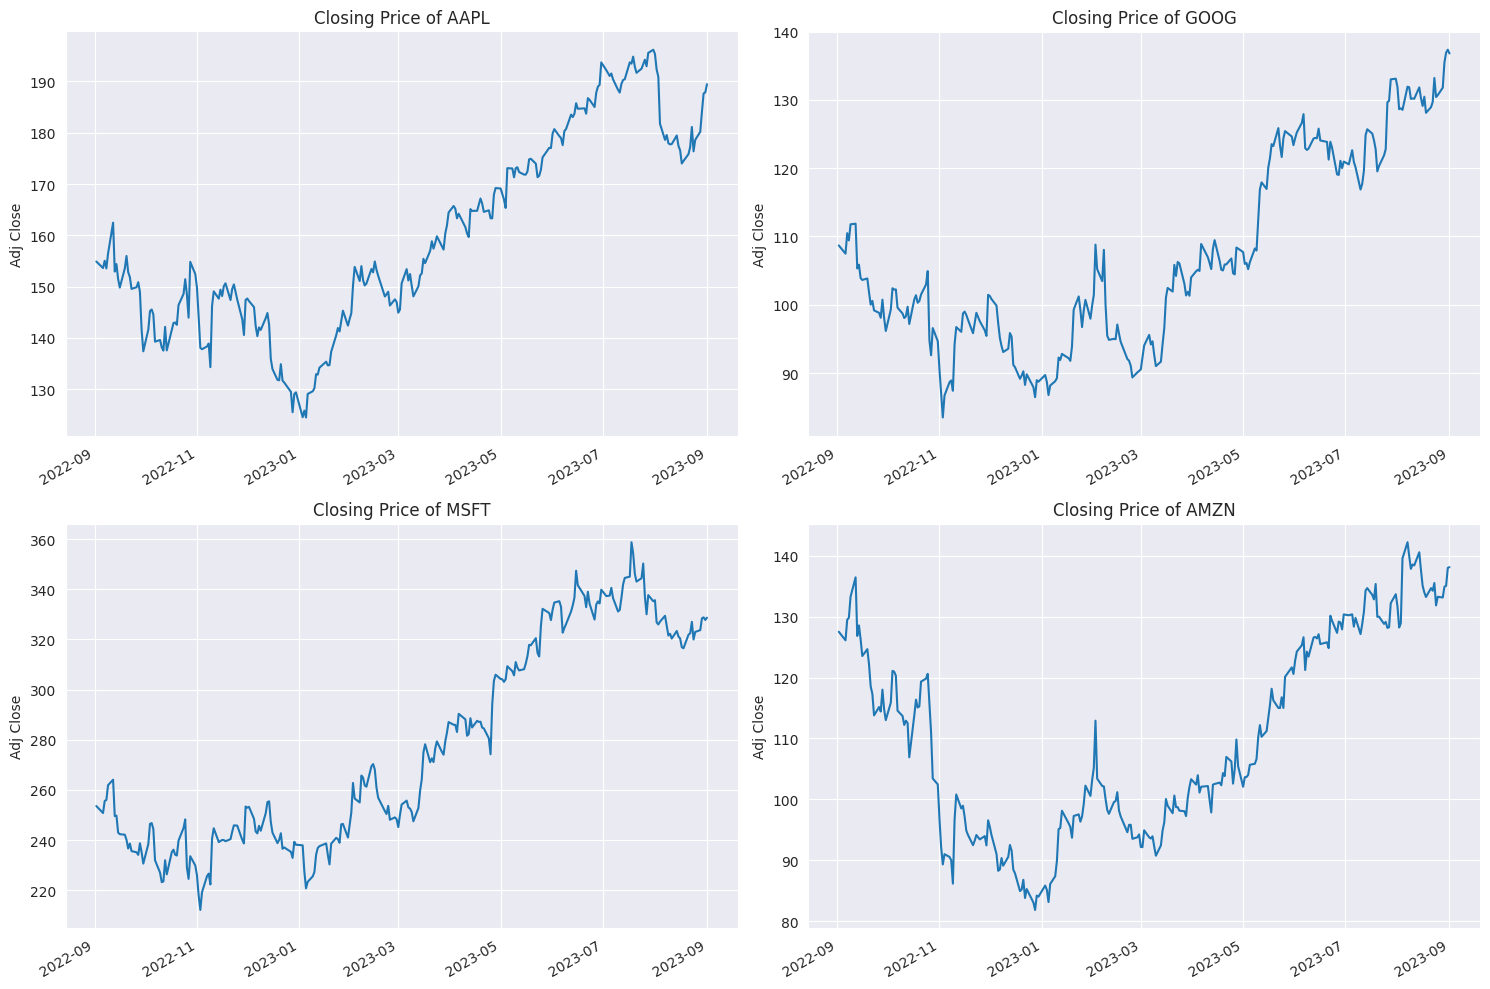

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_stocks[i - 1]}")

plt.tight_layout()

# VOLUME OF SALES
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.


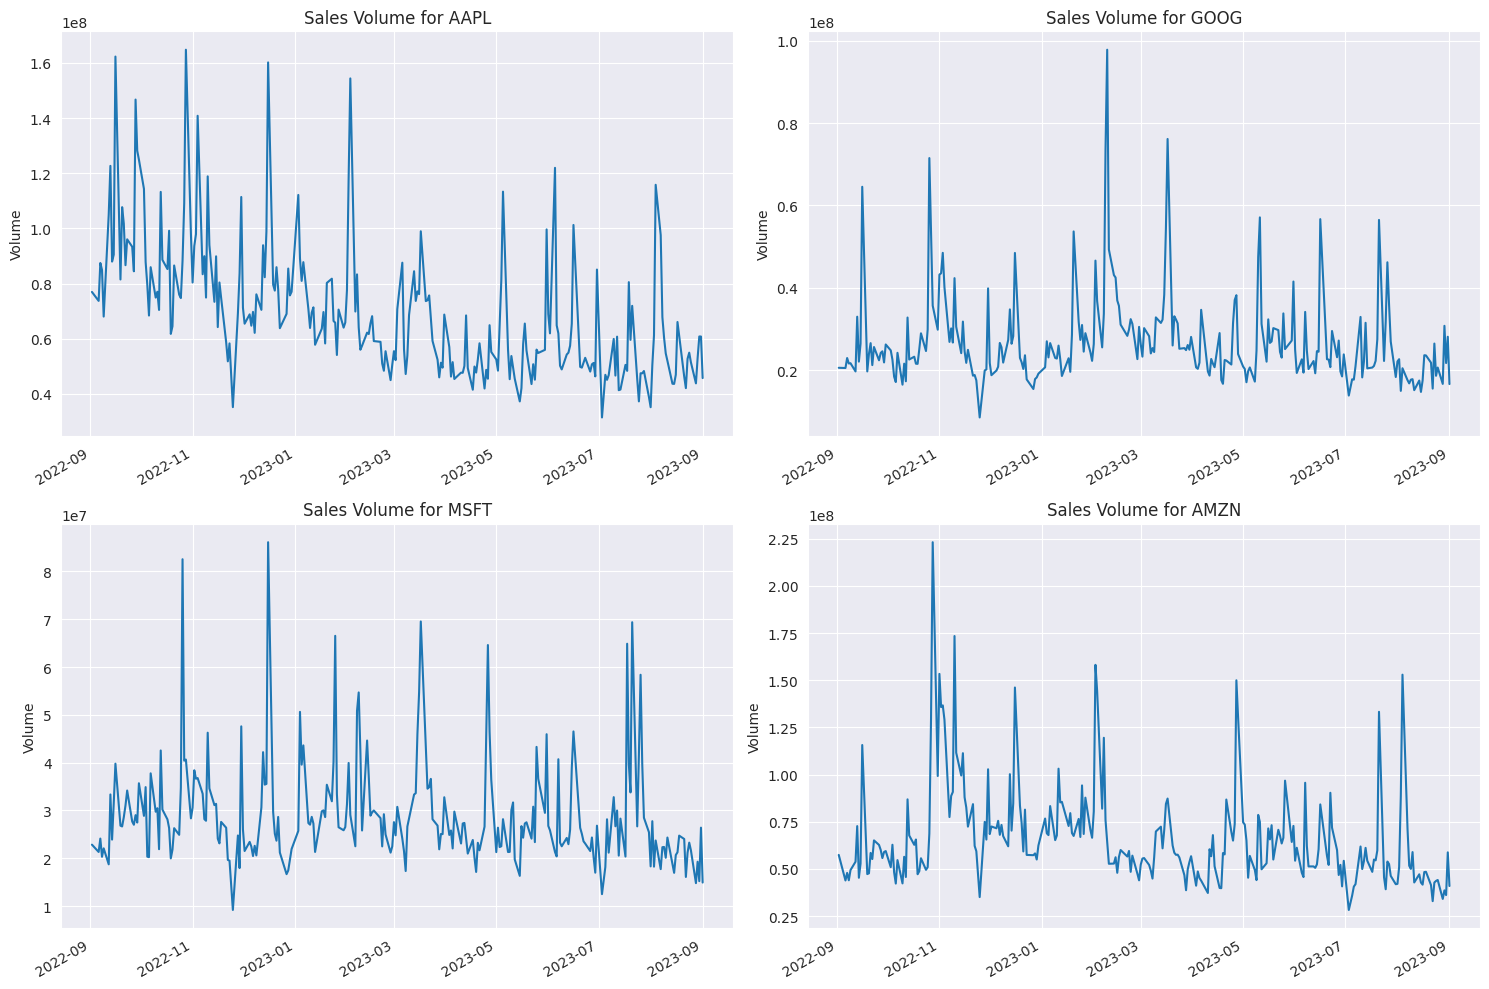

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_stocks[i - 1]}")

plt.tight_layout()

Now, that we've seen the visualizations for the Closing Price and the Volume traded each day, let's move a step ahead and calculate the moving averages.

# MOVING AVERAGES OF THE STOCKS
The Moving Average is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.

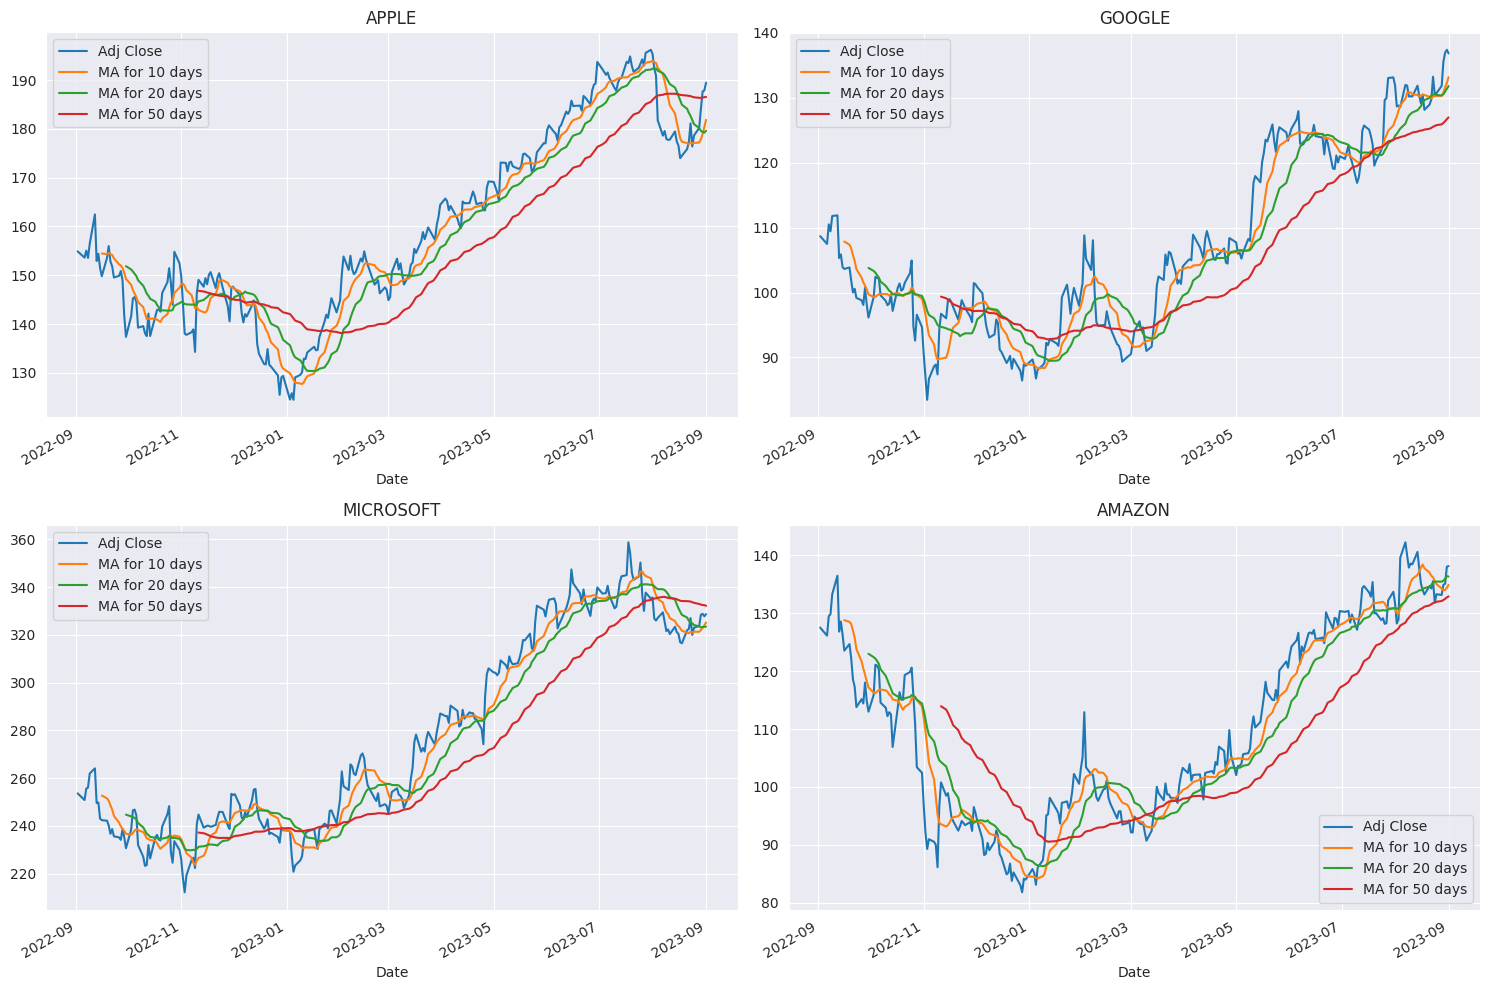

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in tech_companies:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We observe in the above graphs that the best values to measure MA are 10 and 20 days because we still capture trends in the data without noise.

# DAILY RETURNS OF THE STOCK
We're now going to analyze the risk of the stock.

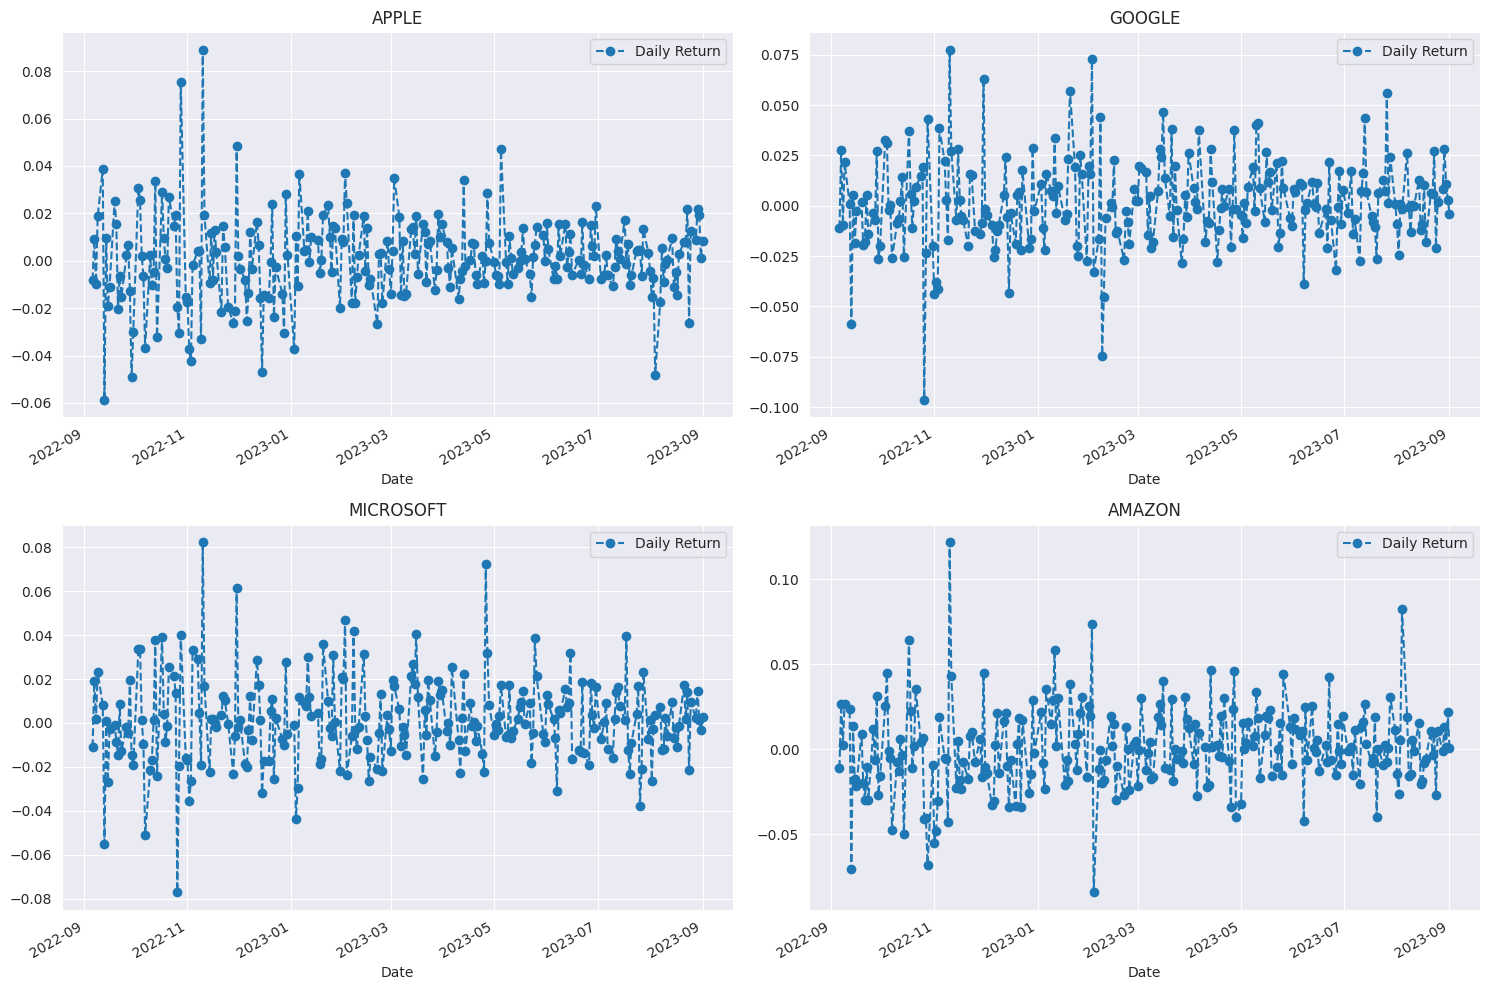

In [ ]:
for company in tech_companies:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now, let's get an overall look at the average daily return using a histogram.

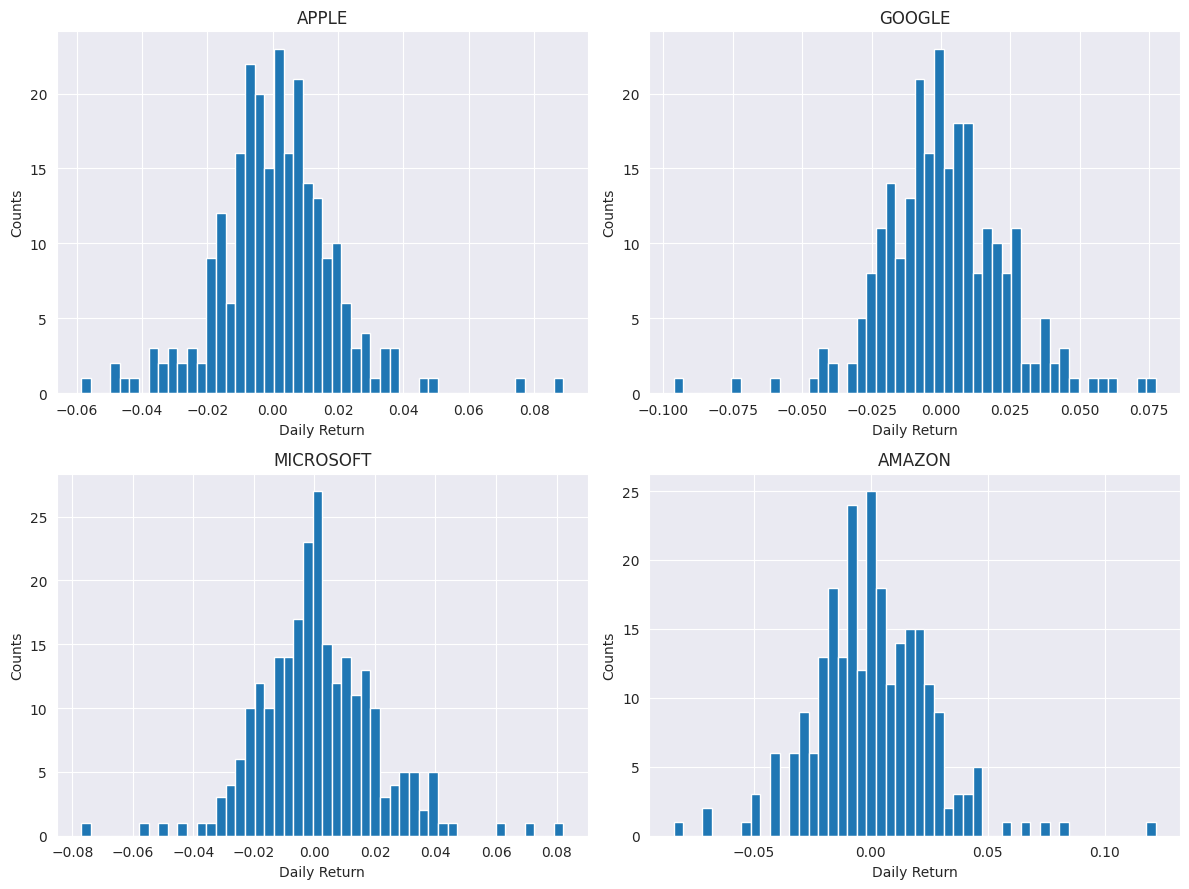

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{Names[i - 1]}')

plt.tight_layout()

## CORRELATION BETWEEN DIFFERENT STOCKS CLOSING PRICE

In [ ]:
closing_df = pdr.get_data_yahoo(tech_stocks, start=start, end=end)['Adj Close']

tech_returns = closing_df.pct_change()
tech_returns.head()

[*********************100%%**********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                              
2022-09-02       NaN       NaN       NaN       NaN
2022-09-06 -0.008215 -0.010980 -0.011042 -0.010974
2022-09-07  0.009254  0.026723  0.027912  0.019112
2022-09-08 -0.009618  0.002626 -0.009595  0.001666
2022-09-09  0.018840  0.026575  0.021568  0.022977

Now, we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

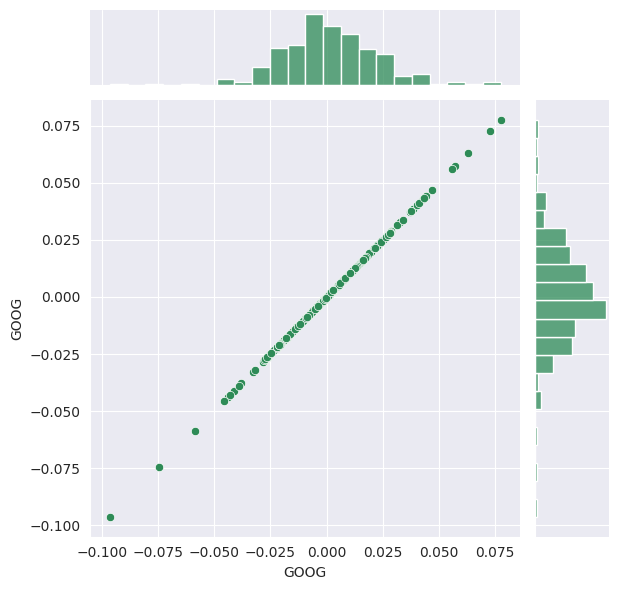

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_returns, kind='scatter', color='seagreen')

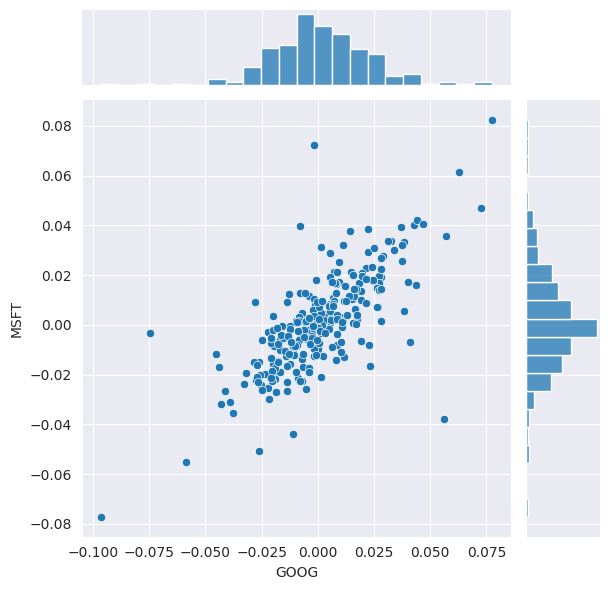

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_returns, kind='scatter')

We can see that if two stocks are perfectly and positively correlated with each other a linear relationship between its daily return values should occur.

We'll repeat this comparision analysis for every possible combination of stocks in our tech stocks ticker list.

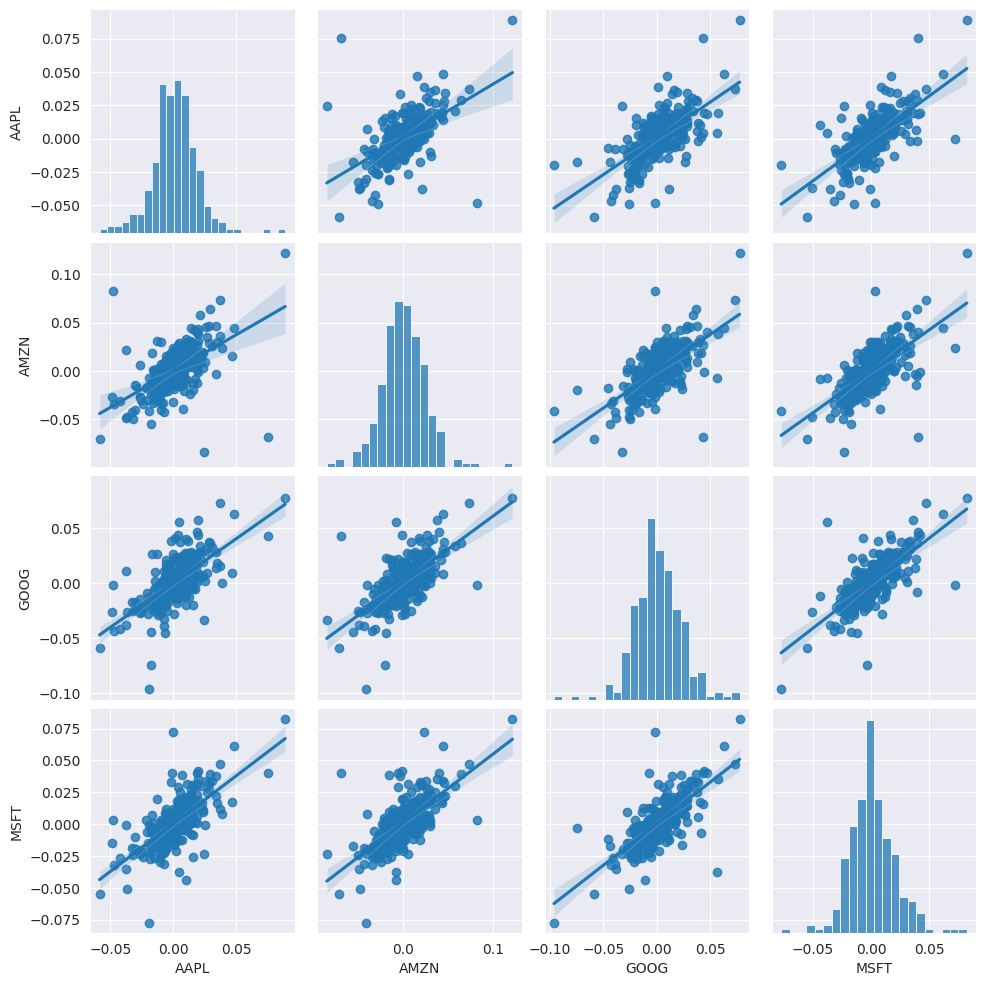

In [ ]:
sns.pairplot(tech_returns, kind='reg')

We can see an interesting correlation between Google and Amazon daily returns.

We can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

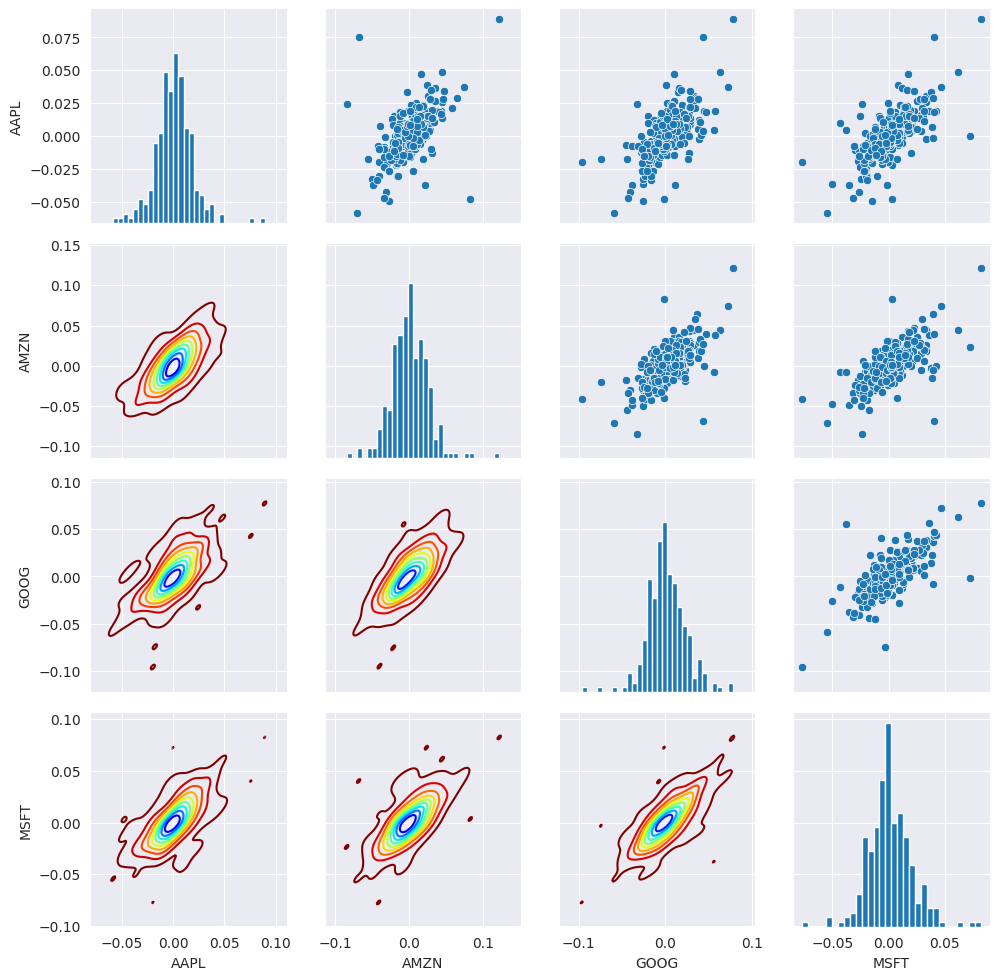

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.scatterplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='jet_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

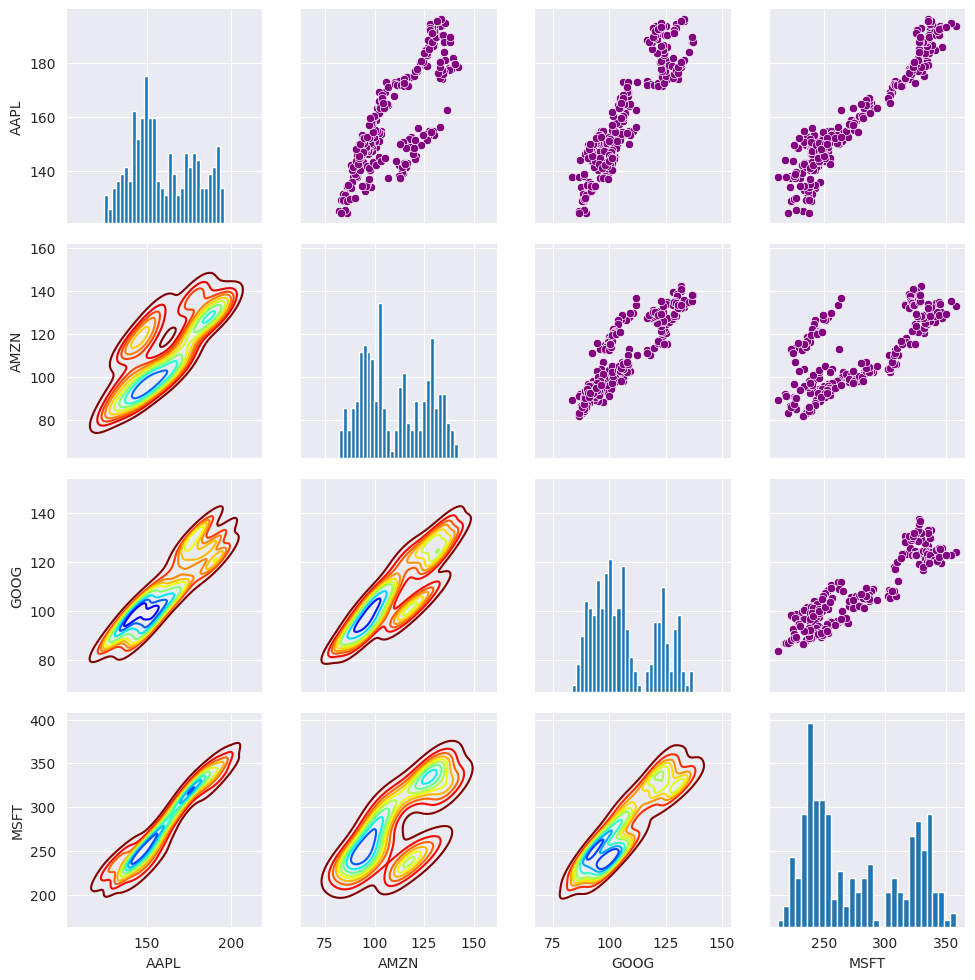

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(sns.scatterplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='jet_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Let's also quickly do a correlation plot, to get the actual numerical values for the correlation between the stocks' daily return values.

Text(0.5, 1.0, 'Correlation of stock closing price')

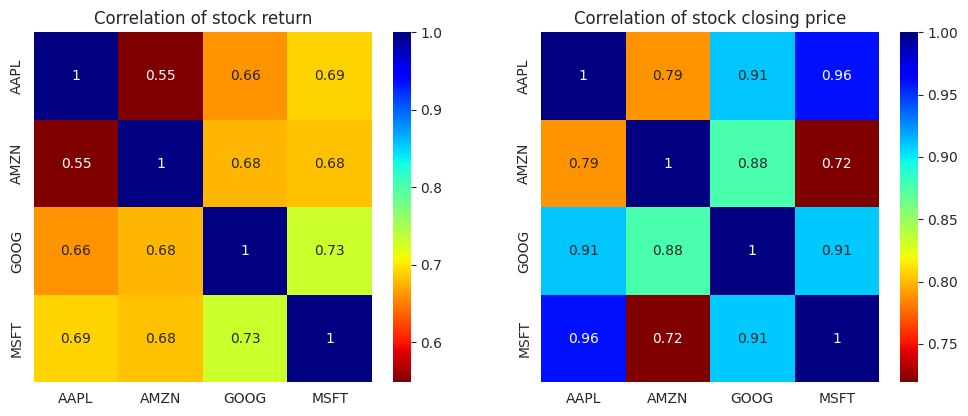

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True, cmap='jet_r')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='jet_r')
plt.title('Correlation of stock closing price')

As suspected in our pairplot, we can numerically see that Microsoft and Amazon also have the strongest correlation of daily stock return.

## Quantifying Risks of Investing

Here, we compare the expected return with the standard deviation of the daily returns, to analyze the risk.

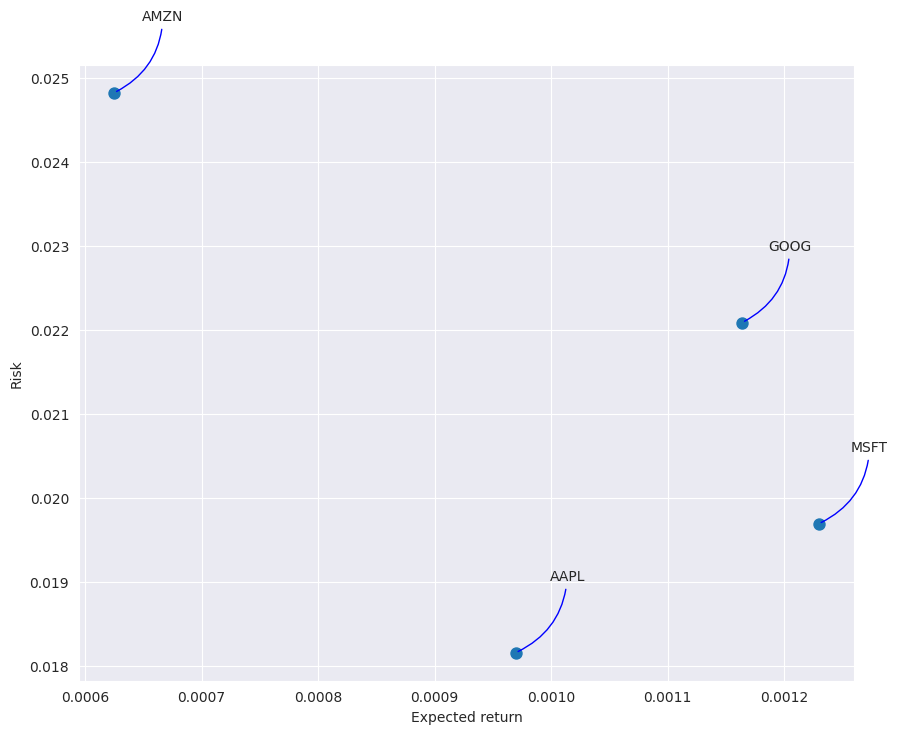

In [ ]:
returns = tech_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

PREDICTION OF CLOSING PRICE OF APPLE inc

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.466090   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.533088   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.672227   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.804702   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.784390   
...                ...         ...         ...         ...         ...   
2023-08-28  180.089996  180.589996  178.550003  180.190002  180.190002   
2023-08-29  179.699997  184.899994  179.500000  184.119995  184.119995   
2023-08-30  184.940002  187.850006  184.740005  187.649994  187.649994   
2023-08-31  187.839996  189.119995  187.479996  187.869995  187.869995   
2023-09-01  189.490005  189.919998  188.279999  189.460007  189.460007   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2023-08-28   43820700  
2023-08-29   53003900  
2023-08-30   60813900  
2023-08-31   60794500  
2023-09-01   45732600  

[2936 rows x 6 columns]

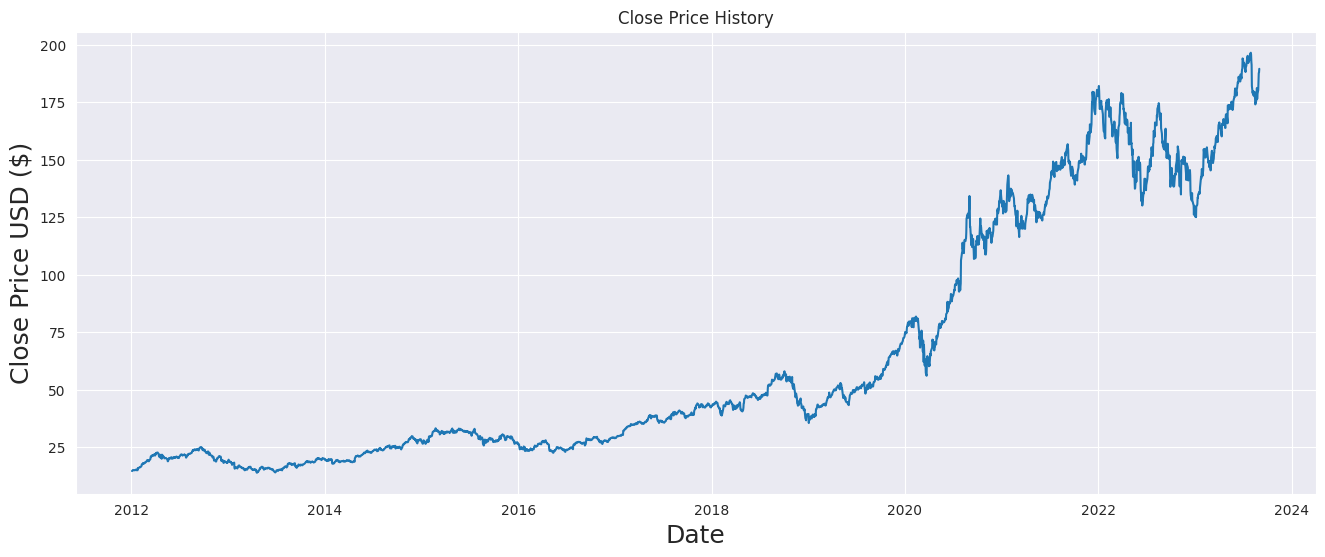

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2790

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.95178146],
       [0.95298693],
       [0.96169921]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2730/2730 [==============================] - 146s 52ms/step - loss: 0.0011


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 35ms/step


3.45739966236406

<ipython-input-79-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


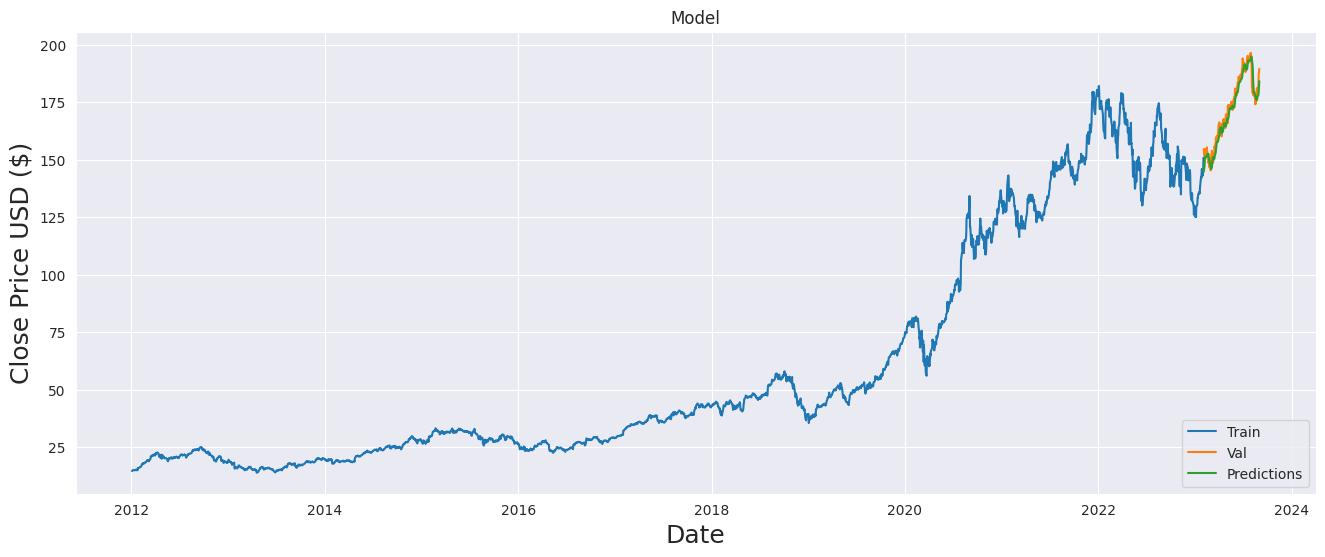

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Close  Predictions
Date                               
2023-02-03  154.500000   144.620316
2023-02-06  151.729996   146.996872
2023-02-07  154.649994   148.743591
2023-02-08  151.919998   150.486237
2023-02-09  150.869995   151.287491
...                ...          ...
2023-08-28  180.190002   177.875885
2023-08-29  184.119995   178.503586
2023-08-30  187.649994   179.901398
2023-08-31  187.869995   182.050125
2023-09-01  189.460007   184.097717

[146 rows x 2 columns]

It was fun discovering all the trends and relations in a time series data.

I'm also working on creating a web app for the same, to dynamically visualize all the trends in the stock price data in just a click.

Until then,
# HAPPY EXPLORATION...